In [25]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

In [12]:
def read_pickle(filename):
    with open(filename+".pkl", 'rb') as read_file:
        obj = pickle.load(read_file)
        return obj

In [13]:
def write_pickle(df, filename):
    with open(filename+".pkl", "wb") as to_write:
        pickle.dump(df, to_write)

In [14]:
def calculate_open_time(t):
    if(t == 'closed' or t == 'Closed'):
        return 0
    elif(t == 'Open 24 hours'):
        return 24
    elif (type(t)!=float):
        t1 = t.split('-')[0].replace(' ','')
        t2 = t.split('-')[1].replace(' ','')
        tm1 = pd.to_datetime(t1, format="%I:%M%p")
        tm2 = pd.to_datetime(t2, format="%I:%M%p")
        res = tm2 - tm1
        diff_time = res.days, res.seconds//3600, (res.seconds//60)%60
        diff_decimal = diff_time[1]+((diff_time[2])/60)
        return diff_decimal

In [15]:
def clean_food_type(food_type):
    if (type(food_type)!=float):
        return [x.strip() for x in food_type.split(',')]

In [16]:
column_headers = ['Restaurant_Name', 'Rating', 'Number_of_Reviews', 'Price_Range', 'Food_Type',
                 'Number_of_Photos', 'Mon_Hours', 'Tue_Hours', 'Wed_Hours', 'Thu_Hours', 
                  'Fri_Hours', 'Sat_Hours', 'Sun_Hours']

In [17]:
rest_data_list_1 = read_pickle('rest_data_1')
rest_data_list_2 = read_pickle('rest_data_2')
rest_data_list_3 = read_pickle('rest_data_3')
rest_data_list_4 = read_pickle('rest_data_4')

In [18]:
df_1 = pd.DataFrame(rest_data_list_1, columns=column_headers)
df_2 = pd.DataFrame(rest_data_list_2, columns=column_headers)
df_3 = pd.DataFrame(rest_data_list_3, columns=column_headers)
df_4 = pd.DataFrame(rest_data_list_4, columns=column_headers)

In [19]:
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [20]:
df = df.dropna(thresh=df.shape[1]-7) # drop rows that have more that 7 nan

In [21]:
df['Mon_Hours'] = [calculate_open_time(t) for t in df['Mon_Hours']]
df['Tue_Hours'] = [calculate_open_time(t) for t in df['Tue_Hours']]
df['Wed_Hours'] = [calculate_open_time(t) for t in df['Wed_Hours']]
df['Thu_Hours'] = [calculate_open_time(t) for t in df['Thu_Hours']]
df['Fri_Hours'] = [calculate_open_time(t) for t in df['Fri_Hours']]
df['Sat_Hours'] = [calculate_open_time(t) for t in df['Sat_Hours']]
df['Sun_Hours'] = [calculate_open_time(t) for t in df['Sun_Hours']]

In [22]:
df['Food_Type'] = [clean_food_type(t) for t in df['Food_Type']]

In [23]:
write_pickle(df, 'cleaned_dataframe')

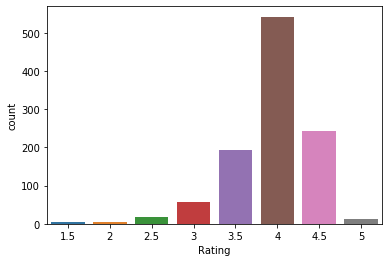

In [26]:
ax = sns.countplot(x=df.Rating, data=df)

In [164]:
food_types = list(pd.Series(df.Food_Type.sum()).value_counts().index.values)

In [165]:
food_types.sort()

In [166]:
food_types

['Afghan',
 'American (New)',
 'American (Traditional)',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Barbeque',
 'Bars',
 'Basque',
 'Beer',
 'Beer Bar',
 'Boat Tours',
 'Boating',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Cabaret',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'Caterers',
 'Cheesesteaks',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Cocktail Bars',
 'Coffee & Tea',
 'Comfort Food',
 'Creperies',
 'Cuban',
 'Delis',
 'Desserts',
 'Dim Sum',
 'Diners',
 'Dinner Theater',
 'Dominican',
 'Falafel',
 'Farmers Market',
 'Fast Food',
 'Food',
 'Food Court',
 'Food Stands',
 'Food Trucks',
 'French',
 'Gastropubs',
 'Gelato',
 'German',
 'Gluten-Free',
 'Greek',
 'Grocery',
 'Halal',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Hong Kong Style Cafe',
 'Hot Dogs',
 'Hot Pot',
 'Iberian',
 'Ice Cream & Frozen Yogurt',
 'Indian

In [47]:
from collections import defaultdict
type_count = defaultdict(int)
for f in food_types:
    for r in df.Food_Type:
        if f in r:
            type_count[f] += 1

In [131]:
list(food_types)

['Afghan',
 'American (New)',
 'American (Traditional)',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Barbeque',
 'Bars',
 'Basque',
 'Beer',
 'Beer Bar',
 'Boat Tours',
 'Boating',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Cabaret',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'Caterers',
 'Cheesesteaks',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Cocktail Bars',
 'Coffee & Tea',
 'Comfort Food',
 'Creperies',
 'Cuban',
 'Delis',
 'Desserts',
 'Dim Sum',
 'Diners',
 'Dinner Theater',
 'Dominican',
 'Falafel',
 'Farmers Market',
 'Fast Food',
 'Food',
 'Food Court',
 'Food Stands',
 'Food Trucks',
 'French',
 'Gastropubs',
 'Gelato',
 'German',
 'Gluten-Free',
 'Greek',
 'Grocery',
 'Halal',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Hong Kong Style Cafe',
 'Hot Dogs',
 'Hot Pot',
 'Iberian',
 'Ice Cream & Frozen Yogurt',
 'Indian

In [50]:
type_count = [{key:value} for key, value in sorted(type_count.items(), key=lambda item: item[1], reverse = True)]


In [149]:
type_count

[{'American (New)': 207},
 {'Italian': 194},
 {'Seafood': 114},
 {'Steakhouses': 94},
 {'Breakfast & Brunch': 93},
 {'French': 93},
 {'Cocktail Bars': 87},
 {'Bars': 82},
 {'Wine Bars': 77},
 {'Chinese': 65},
 {'Pizza': 64},
 {'American (Traditional)': 61},
 {'Japanese': 57},
 {'Mediterranean': 54},
 {'Sushi Bars': 46},
 {'Mexican': 45},
 {'Venues & Event Spaces': 38},
 {'Sandwiches': 30},
 {'Asian Fusion': 27},
 {'Burgers': 26},
 {'Desserts': 26},
 {'Indian': 24},
 {'Greek': 22},
 {'Noodles': 22},
 {'Salad': 20},
 {'Spanish': 20},
 {'Coffee & Tea': 19},
 {'Diners': 18},
 {'Fast Food': 18},
 {'Cafes': 17},
 {'Lounges': 16},
 {'Tapas/Small Plates': 16},
 {'Vietnamese': 16},
 {'Halal': 15},
 {'Middle Eastern': 15},
 {'Korean': 14},
 {'Latin American': 14},
 {'Tapas Bars': 14},
 {'Delis': 13},
 {'Vegetarian': 12},
 {'Caribbean': 10},
 {'Comfort Food': 10},
 {'Thai': 10},
 {'Vegan': 10},
 {'Barbeque': 8},
 {'Cantonese': 8},
 {'Gluten-Free': 8},
 {'Cuban': 7},
 {'Gastropubs': 7},
 {'Caterer

In [127]:
frame = df.copy()
frame['Food_Type'] = frame['Food_Type'].apply(lambda x: x.replace(' ','').split(','))
categories = list(set(frame['Food_Type'].sum()))
df_cat = pd.DataFrame(0,index=frame.index,columns=categories)
for cat in categories:
    df_cat[cat]=frame['Food_Type'].apply(lambda cat_list: int(cat in cat_list))
pd.concat([frame,df_cat],axis=1)




AttributeError: 'list' object has no attribute 'replace'

In [96]:
categories 

['Irish Pub',
 'Caterers',
 'Soul Food',
 'Scandinavian',
 'Tiki Bars',
 'Creperies',
 'Brazilian',
 'Dim Sum',
 'German',
 'Sandwiches',
 'Pizza',
 'Wine Bars',
 'Beer',
 'Ramen',
 'Russian',
 'Ice Cream & Frozen Yogurt',
 'Asian Fusion',
 'Halal',
 'Steakhouses',
 'Dominican',
 'Venezuelan',
 'Chicken Wings',
 'Juice Bars & Smoothies',
 'Food Court',
 'Cajun/Creole',
 'Vegan',
 'Tea Rooms',
 'Comfort Food',
 'Tapas/Small Plates',
 'Korean',
 'Beer Bar',
 'Somali',
 'Afghan',
 'Specialty Food',
 'Mexican',
 'Gastropubs',
 'Southern',
 'Cantonese',
 'Seafood',
 'Bagels',
 'Boat Tours',
 'Soup',
 'Iberian',
 'Kosher',
 'Italian',
 'Farmers Market',
 'Armenian',
 'Cheesesteaks',
 'Burgers',
 'Pasta Shops',
 'Mediterranean',
 'Wedding Planning',
 'Bangladeshi',
 'Peruvian',
 'Salad',
 'Breakfast & Brunch',
 'Buffets',
 'Hawaiian',
 'Hong Kong Style Cafe',
 'Bars',
 'Barbeque',
 'Hot Dogs',
 'Basque',
 'Ukrainian',
 'Sushi Bars',
 'Venues & Event Spaces',
 'Dinner Theater',
 'Diners',
 'St

In [59]:
df_cat = pd.DataFrame(0,index=df.index,columns=categories)
for cat in categories:
    df_cat[cat]=df['Food_Type'].apply(lambda cat_list: int(cat in cat_list))
df_ = pd.concat([df,df_cat],axis=1)

In [ ]:
def explode(frame,cat_col,sep=','):
    '''inputs-
    frame: input dataframe
    cat_col: name of the category column
    sep: is the seperator between the catgories
    
    output-
    new dataframe with binary values for category columns
    '''
    df=frame.copy()
    df[cat_col]=df[cat_col].apply(lambda x: x.replace(' ','').split(sep))
    categories=list(set(df[cat_col].sum()))
    df_cat=pd.DataFrame(0,index=df.index,columns=categories)
    for cat in categories:
        df_cat[cat]=df[cat_col].apply(lambda cat_list: int(cat in cat_list))
    return pd.concat([df,df_cat],axis=1)
    
#test
restaurants=pd.DataFrame([[7,'French | Sushi| Deli'],
                [6,'Deli | Pizza'],
                [8,'Pizza | Sushi| Deli']],
               columns=['rating','cuisines'])
explode(restaurants,'cuisines',sep='|')

In [ ]:
def explode(frame, cat_col, sep=','):
    '''inputs-
    frame: input dataframe
    cat_col: name of the category column
    sep: is the seperator between the catgories
    
    output-
    new dataframe with binary values for category columns
    '''
    df = frame.copy()
    df[cat_col] = df[cat_col].apply(lambda x: x.replace(' ','').split(sep))
    categories=list(set(df[cat_col].sum()))
    df_cat=pd.DataFrame(0,index=df.index,columns=categories)
    for cat in categories:
        df_cat[cat]=df[cat_col].apply(lambda cat_list: int(cat in cat_list))
    return pd.concat([df,df_cat],axis=1)

In [167]:
food_types_series = pd.Series(food_types)
american = food_types_series.apply(lambda ft: ("american" in ft.lower()))
american_list = food_types_series[american].tolist()
food_types = [f for f in food_types if f not in american_list]

food_types_series = pd.Series(food_types)
east_asian = food_types_series.apply(lambda ft: ("chinese" in ft.lower()) or ("japanese" in ft.lower()) 
             or ("sushi" in ft.lower()) or ("vietnamese" in ft.lower() or ("korean" in ft.lower()) or ("korean" in ft.lower())
                                    or ("asian" in ft.lower()) or ("thai" in ft.lower()) or ("noodle" in ft.lower()) or ("hong kong" in ft.lower())))
east_asian_list = food_types_series[east_asian].tolist()
food_types = [f for f in food_types if f not in east_asian_list]

                                
food_types_series = pd.Series(food_types)
italian = food_types_series.apply(lambda ft: ("italian" in ft.lower()) or ("pasta" in ft.lower()) or )
italian_list = food_types_series[italian].tolist()
italian_list
food_types = [f for f in food_types if f not in it]

                                     Seafood                                     
                                     
food_types_series = pd.Series(food_types)
meat = food_types_series.apply(lambda ft: ("steak" in ft.lower()) or ("barbeque" in ft.lower()) or ("burger" in ft.lower())))
meat_list = food_types_series[meat].tolist()
food_types = [f for f in food_types if f not in meat_list]

food_types_series = pd.Series(food_types)
bars = food_types_series.apply(lambda ft: ("bar" in ft.lower()))
bars_list = food_types_series[bars].tolist()
bars_list
food_types = [f for f in food_types if f not in bars_list]

#food_types_series
# ex_df = explode(df,'Food_Type')
# ex_df['American'] = ex_df[kid_list].any(axis=1)
# bookdf = ex_df[book_df.columns.tolist()+['American']]

In [172]:
food_types

['Afghan',
 'Argentine',
 'Armenian',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Basque',
 'Beer',
 'Boat Tours',
 'Boating',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'Caterers',
 'Chicken Shop',
 'Chicken Wings',
 'Coffee & Tea',
 'Comfort Food',
 'Creperies',
 'Cuban',
 'Delis',
 'Desserts',
 'Dim Sum',
 'Diners',
 'Dinner Theater',
 'Dominican',
 'Falafel',
 'Farmers Market',
 'Fast Food',
 'Food',
 'Food Court',
 'Food Stands',
 'Food Trucks',
 'French',
 'Gastropubs',
 'Gelato',
 'German',
 'Gluten-Free',
 'Greek',
 'Grocery',
 'Halal',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Hong Kong Style Cafe',
 'Hot Dogs',
 'Hot Pot',
 'Iberian',
 'Ice Cream & Frozen Yogurt',
 'Indian',
 'Irish Pub',
 'Italian',
 'Izakaya',
 'Jazz & Blues',
 'Korean',
 'Kosher',
 'Lebanese',
 'Live/Raw Food',
 'Lounges',
 'Malaysian',
 'Mediterranean',
 '